*Теоретический материал:* https://youtu.be/TGO-YPrfs1A

In [ ]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline 

# Задача 1. Расстановка грузов по поездам.
## Данные

In [ ]:
train = np.array([1, 12, 72, 4, 55, 1])  # Массив поездов (вместимость)
cargo = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8])  # Массив грузов

print('Train', train.shape, train.sum())
print('Cargo', cargo.shape, cargo.sum())

Train (6,) 145
Cargo (18,) 145


## Настройки

In [ ]:
N = 100  # Общее число ботов
N_SURV = 20  # Количество выживших (столько лучших переходит в новую популяцию)
N_NEW = N - N_SURV  # Количество новых (столько новых ботов создается)
EPOCHS = 2000  # Количество эпох
M = 0.2  # Коэфициент мутаций
TRAINS_LEN = train.shape[0]  # Количество поездов
BOT_LEN = cargo.shape[0]  # Каждая ячейка бота отвечает за индекс поезда, в котором размещён отдельный груз. Т.е. BOT_LEN = количеству грузов

## Функции

In [ ]:
'''
  Функция получения выжившей популяции
    Входные параметры:
    - popul - наша популяция
    - val - текущие значения
    - n_surv - количество выживших
    - mode - указываем требуемую операцию поиска результата: максимизация или минимизация, по умолчанию = 'False' -> по возрастанию
'''
def getSurvPopul(popul, val, n_surv, mode=False):
  new_popul = [] # Двумерный массив для новой популяции
  sort_val = sorted(val, reverse=mode) # Сортируем зачения в val в зависимости от параметра mode 'False' (по возрастанию) / 'True' 
  sort_val_index_list = []  # Для мониторинга

  for i in range(n_surv): # Проходимся по циклу n_surv раз (в итоге в new_popul запишется индексы n_surv лучших показателей)
    index = val.index(sort_val[i]) # Получаем индекс i-того элемента sort_val в исходном массиве val
    new_popul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    sort_val_index_list.append(index)
  return new_popul, sort_val # Возвращаем новую популяцию (из n_surv элементов) и сортированный список


'''
  Функция получения родителей
    Входные параметры:
    - curr_popul - текущая популяция
    - n_surv - количество выживших
'''
def getParents(curr_popul, n_surv):   
  index_1 = random.randint(0, n_surv - 1) # Случайный индекс первого родителя
  index_2 = random.randint(0, n_surv - 1) # Случайный индекс второго родителя
  bot_1 = curr_popul[index_1] # Получаем первого бота-родителя по index_1
  bot_2 = curr_popul[index_2] # Получаем второго бота-родителя по index_2    
  return bot_1, bot_2 # Возвращаем обоих полученных ботов


'''
  Функция смешивания (кроссинговера) двух родителей
    Входные параметры:
    - bot_1 - первый бот-родитель
    - bot_2 - второй бот-родитель
    - j - номер компонента бота
'''
def crossPointFrom2Parents(bot_1, bot_2, j):
    r = random.random() # Получаем случайное число в диапазоне от 0 до 1  
    # Если r меньше 0.5, то берем значения от первого бота, иначе от второго
    if r < 0.5:
      x = bot_1[j]
    else:
      x = bot_2[j]
    return x # Возвращаем значние бота

## Решение

0   170.3   [76, 76, 80, 88, 90, 90, 102, 110, 112, 114, 114, 118, 118, 120, 122, 124, 126, 128, 130, 130]
1   115.54   [24, 38, 42, 54, 62, 64, 72, 76, 76, 78, 78, 80, 82, 86, 88, 88, 88, 88, 88, 90]
2   92.18   [22, 24, 24, 26, 36, 38, 40, 40, 42, 44, 52, 54, 54, 56, 56, 62, 62, 64, 68, 68]
3   66.3   [18, 20, 22, 22, 22, 24, 24, 26, 26, 26, 26, 28, 28, 28, 28, 32, 34, 36, 36, 38]
4   58.66   [14, 18, 20, 20, 20, 22, 22, 22, 22, 22, 24, 24, 24, 26, 26, 26, 26, 28, 28, 28]
5   50.06   [10, 12, 14, 16, 16, 18, 18, 18, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22]
6   43.88   [10, 10, 12, 14, 14, 14, 14, 16, 16, 16, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20]
7   47.26   [8, 8, 10, 10, 12, 12, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 18, 18, 18, 18]
8   45.5   [8, 8, 8, 10, 10, 12, 12, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16]
9   42.82   [8, 8, 8, 8, 8, 10, 10, 10, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16]
10   41.04   [6, 8, 8, 8, 8, 8, 8, 10, 10, 10, 12, 12, 14, 14, 14, 

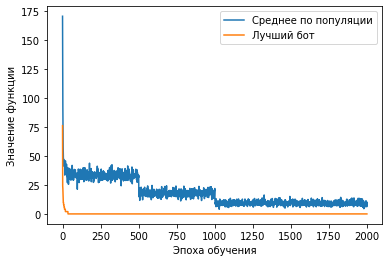

In [ ]:
popul = []  # Двумерный массив популяции, размерностью [n, BOT_LEN].
val = []  # Одномерный массив значений этих ботов

plot_mean_val = [] # Сюда будут заносится значения для графика по среднему значению
plot_min_val = [] # Сюда будут заносится значения для графика по минимальному значению
 
for i in range(N):  # Проходим по всей длине популяции
  popul.append([])  # Создаем пустого бота
  for j in range(BOT_LEN):  # Проходим по всей длине бота
    # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
    popul[i].append(random.randint(0, TRAINS_LEN - 1)) 

for epoch in range(EPOCHS):  # Проходим по всем эпохам
  if (epoch == 500):  # Меняем коэфициент мутации после 500-ой эпохи
    M = 0.1   
  if (epoch == 1000):  # Меняем коэфициет мутации после 1000-ой эпохи
    M = 0.05  

  # ------- РАСЧЁТ ОШИБКИ -------
  val = []  # Создаем пустой список для значений ботов
  for i in range(N):  # Проходим по всей популяции
    bot = popul[i]  # Берем очередного бота
    train_fill = np.array([0, 0, 0, 0, 0, 0, 0, 0])  # Массив, хранящий заполняемость каждого поезда
    for j in range(BOT_LEN):  # Проходим по всей длине бота
      train_fill[bot[j]] += cargo[j]  # Увеличиваем заполненность bot[j]-го поезда на cargo[j]          
    
    f = 0  # Обнуляем ошибку i-го бота 
    for t in range(TRAINS_LEN):  # Проходим по всем поездам
      # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда и вместимостью, который посчитал бот
      f += abs(train[t] - train_fill[t]) 
    val.append(f) #  Добавляем в val значение ошибки для i-го бота    
  # -------

  new_popul, sort_val = getSurvPopul(popul, val, N_SURV, False)  # Получаем новую популяцию и сортированный список значнией
  print(epoch, " ", sum(val) / len(val), " ", sort_val[0:20])  # Выводим среднее значение и 20 лучших ботов  
  plot_mean_val.append(sum(val) / len(val)) # Добавляем среднее значение в список
  plot_min_val.append(sort_val[0]) # Добавляем минимальное значение в список
  
  for i in range(N_NEW): # Проходимся в цикле N_NEW раз
    bot_parent_1, bot_parent_2 = getParents(new_popul, N_SURV)  # Из new_popul(новой популяции) получаем двух случайных родителей-ботов
    new_bot = []  # Массив для нового бота

    for j in range(BOT_LEN): # Проходим по всей длине бота
      x = crossPointFrom2Parents(bot_parent_1, bot_parent_2, j) # Получаем значение для j-ого компонента бота
      # Мутация
      # С вероятностью M сбрасываем значение j-ого компонента бота на случайное
      if (random.random() < M):
        x = random.randint(0, TRAINS_LEN - 1)  # Индекс вагона - целое число от 0 до 7    
      new_bot.append(x)  # Добавляем новое значение в бота      
    new_popul.append(new_bot)  # Добавляем бота в новую популяцию    
  popul = new_popul  # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plot_mean_val, label='Среднее по популяции')
plt.plot(plot_min_val, label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 20 лучших ботов
for i in range(20):
  print(popul[i])

[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
[2, 5, 1, 

In [ ]:
bot = popul[0]  # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)  # Выводим значения бота (каждый параметр хранит номер вагона, в который следует разместить груз)

train_fill = np.zeros(TRAINS_LEN, dtype = 'int32')  # Массив заполненности поездов
for j in range(BOT_LEN):  # Проходим по всей длине бота
  train_fill[bot[j]] += cargo[j] # Увеличиваем заполненность bot[j]-ого поезда на cargo[j]

print ('Вместимость поездов по боту:', train_fill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [2, 5, 1, 4, 3, 4, 1, 4, 0, 4, 2, 4, 4, 2, 2, 2, 4, 1]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


# Вывод
Видим полное заполнение поездов.


# ========================================



# Задача 2. Равномерное распределение грузов по поездам.
## Суть идеи решения:
1. Равномерное заполнение означает, что каждый поезд в процентном соотношении заполнен как и все остальные.
2. Вычислим среднее значение и ошибкой будем считать отклонение от среднего значения.
## Данные

In [ ]:
train = np.array([10, 10, 10, 12, 12, 12])  # Массив поездов (вместимость)
cargo = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])  # Массив грузов

print('Train', train.shape, train.sum())
print('Cargo', cargo.shape, cargo.sum())

Train (6,) 66
Cargo (18,) 54


## Настройки

In [ ]:
N = 100  # Общее число ботов
N_SURV = 20  # Количество выживших (столько лучших переходит в новую популяцию)
N_NEW = N - N_SURV  # Количество новых (столько новых ботов создается)
EPOCHS = 1000  # Количество эпох
M = 0.2  # Коэфициент мутаций
TRAINS_LEN = train.shape[0]  # Количество поездов
BOT_LEN = cargo.shape[0]  # Каждая ячейка бота отвечает за индекс поезда, в котором размещён отдельный груз. Т.е. BOT_LEN = количеству грузов
MEAN = cargo.sum() / train.sum()  # Нормализованная средняя заполняемость
print(MEAN)

0.8181818181818182


## Решение

0   25.705454545454558   [6.363636363636363, 8.363636363636363, 9.09090909090909, 11.272727272727273, 12.0, 12.363636363636363, 12.363636363636363, 13.09090909090909, 13.636363636363637, 14.0, 14.0, 14.363636363636363, 15.272727272727273, 16.363636363636363, 17.636363636363633, 17.636363636363637, 18.0, 18.0, 18.0, 18.36363636363636]
1   20.03454545454546   [6.363636363636363, 8.363636363636363, 8.363636363636363, 8.90909090909091, 9.09090909090909, 10.0, 10.363636363636363, 10.363636363636363, 11.272727272727273, 11.636363636363637, 11.636363636363637, 11.636363636363637, 11.636363636363637, 12.0, 12.363636363636363, 12.363636363636363, 12.363636363636363, 12.727272727272727, 13.09090909090909, 13.636363636363637]
2   19.243636363636366   [6.363636363636363, 8.363636363636363, 8.363636363636363, 8.90909090909091, 9.09090909090909, 9.636363636363637, 10.0, 10.363636363636363, 10.363636363636363, 10.363636363636363, 10.727272727272727, 11.272727272727273, 11.636363636363637, 11.63636363

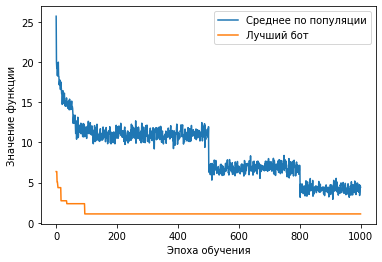

In [ ]:
popul = []  # Двумерный массив популяции, размерностью [n, BOT_LEN].
val = []  # Одномерный массив значений этих ботов

plot_mean_val = [] # Сюда будут заносится значения для графика по среднему значению
plot_min_val = [] # Сюда будут заносится значения для графика по минимальному значению

# Рандомно заполняем все боты 
for i in range(N):  # Проходим по всей длине популяции
  popul.append([])  # Создаем пустого бота
  for j in range(BOT_LEN):  # Проходим по всей длине бота
    # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
    popul[i].append(random.randint(0, TRAINS_LEN - 1)) 


# Проходим по всем эпохам
for epoch in range(EPOCHS):  
  if (epoch == 500):  # Меняем коэфициент мутации после 500-ой эпохи
    M = 0.1   
  if (epoch == 800):  # Меняем коэфициет мутации после 1000-ой эпохи
    M = 0.05  

  # ------- РАСЧЁТ ОШИБКИ -------
  val = []  # Создаем пустой список для значений ботов
  for i in range(N):  # Проходим по всей популяции
    bot = popul[i]  # Берем очередного бота
    train_fill = np.array([0, 0, 0, 0, 0, 0, 0, 0])  # Массив, хранящий заполняемость каждого поезда
    for j in range(BOT_LEN):  # Проходим по всей длине бота
      # Каждая ячейка бота отвечает за индекс поезда, в котором размещён отдельный груз. Т.е. BOT_LEN = количеству грузов
      train_fill[bot[j]] += cargo[j]  # Увеличиваем заполненность bot[j]-го поезда на cargo[j]          
    
    f = 0  # Обнуляем ошибку i-го бота 
    # Считаем ошибку для конкретного поезда
    for t in range(TRAINS_LEN):  # Проходим по всем поездам
      # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда и вместимостью, который посчитал бот
      f += abs(train[t]*MEAN - train_fill[t]) 
    val.append(f) #  Добавляем в val значение ошибки для i-го бота    
  # -------

  new_popul, sort_val = getSurvPopul(popul, val, N_SURV, False)  # Получаем новую популяцию и сортированный список значнией
  print(epoch, " ", sum(val) / len(val), " ", sort_val[0:20])  # Выводим среднее значение и 20 лучших ботов  
  plot_mean_val.append(sum(val) / len(val)) # Добавляем среднее значение в список
  plot_min_val.append(sort_val[0]) # Добавляем минимальное значение в список
  
  for i in range(N_NEW): # Проходимся в цикле N_NEW раз
    bot_parent_1, bot_parent_2 = getParents(new_popul, N_SURV)  # Из new_popul(новой популяции) получаем двух случайных родителей-ботов
    new_bot = []  # Массив для нового бота

    for j in range(BOT_LEN): # Проходим по всей длине бота
      x = crossPointFrom2Parents(bot_parent_1, bot_parent_2, j) # Получаем значение для j-ого компонента бота
      # Мутация
      # С вероятностью M сбрасываем значение j-ого компонента бота на случайное
      if (random.random() < M):
        x = random.randint(0, TRAINS_LEN - 1)  # Индекс вагона - целое число от 0 до 7    
      new_bot.append(x)  # Добавляем новое значение в бота      
    new_popul.append(new_bot)  # Добавляем бота в новую популяцию    
  popul = new_popul  # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plot_mean_val, label='Среднее по популяции')
plt.plot(plot_min_val, label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
bot = popul[0]  # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)  # Выводим значения бота (каждый параметр хранит номер вагона, в который следует разместить груз)

train_fill = np.zeros(TRAINS_LEN, dtype = 'int32')  # Массив заполненности поездов
for j in range(BOT_LEN):  # Проходим по всей длине бота
  train_fill[bot[j]] += cargo[j] # Увеличиваем заполненность bot[j]-ого поезда на cargo[j]

print ('Вместимость поездов по боту:', train_fill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [4, 3, 4, 5, 1, 2, 0, 5, 0, 5, 0, 4, 5, 3, 3, 4, 2, 1]
Вместимость поездов по боту: [ 8  8  8 10 10 10]
Реальная вместимость поездов: [10 10 10 12 12 12]


# Вывод
Видим равномерное заполнение поездов.